## Load Relevant Libraries

In [118]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
style.use('fivethirtyeight')
data = pd.read_csv('titanic-Copy1.csv')

## Exploratory and Explanatory Data Analysis

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Who Didn't Get Assigned A Cabin Number?

In [108]:
data[data['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [111]:
missing_cabin_num = data[data['Cabin'].isna()]
missing_cabin_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## What Happened To The People Without Assigned Cabin Numbers?
Almost 690 boarders did not have a cabin number. About 3 in 5 men that did not have an assigned cabin number did not survive the disaster. By comparison, only 2 in 5 women did not survive. 

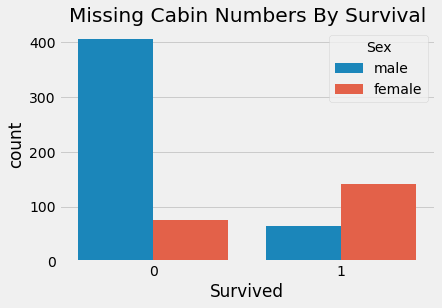

In [109]:
sns.countplot(x='Survived', hue='Sex', data=missing_cabin_num)
plt.title('Missing Cabin Numbers By Survival')
plt.show()

## Did Anyone get a Free Ride On The Ship?

In [10]:
data['Fare'].isna().any()

False

Some of the boarders got free rides. The median ticket price was about 15 in local currency. The most expensive ticket, the outlier, was more the 500 in local currency. This price is more the current round trip aeroplane ticket price to travel from Chicago, Illinois to Orlando, Florida. 

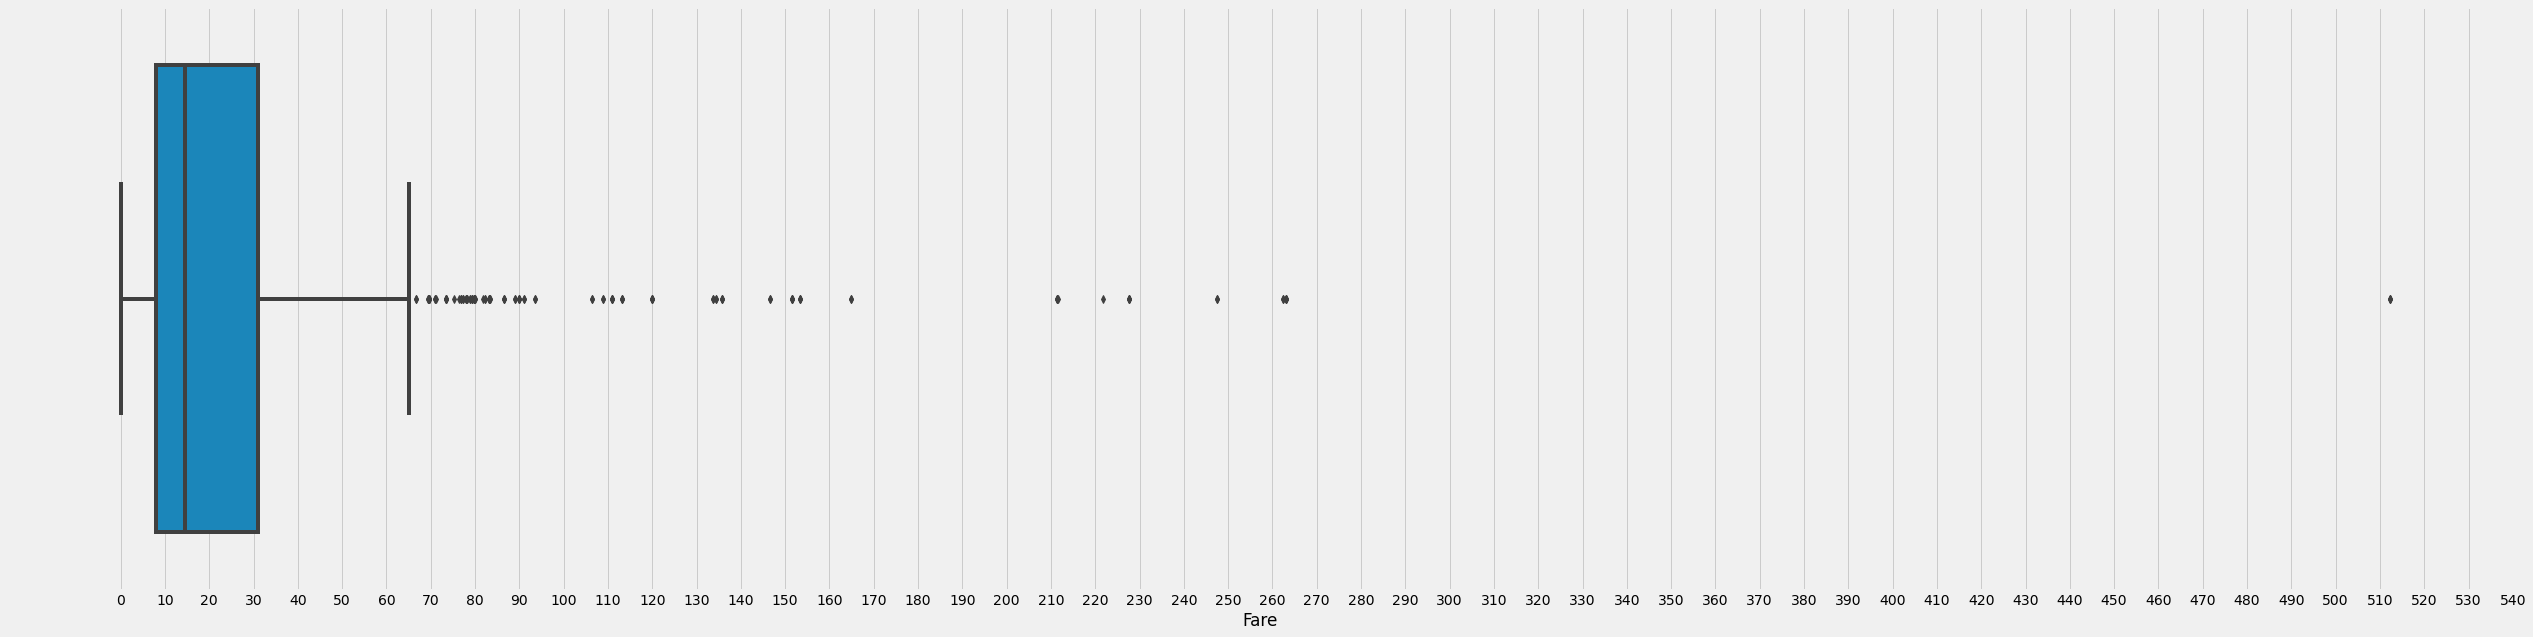

In [33]:
plt.figure(figsize=(40, 10))
sns.boxplot(x='Fare', data=data)
plt.xticks(np.arange(0, 550, step=10))
plt.show()

## What's The Relationship Between Age and Ticket Prices?

<Figure size 1440x1440 with 0 Axes>

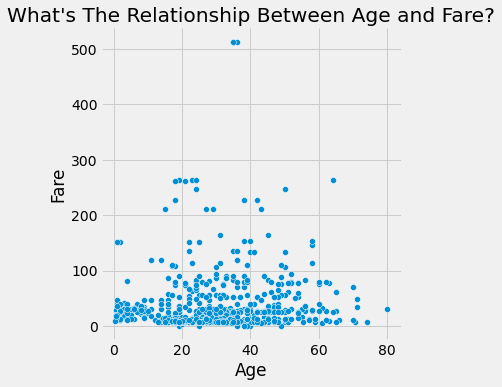

In [112]:
plt.figure(figsize=(20, 20))
sns.relplot(x='Age', y='Fare', data=data)
plt.title("What's The Relationship Between Age and Fare?")
plt.show()

There is no apparent relationship between age and fares. A small number of people in their late thirties paid more than 500 in local currency. It is unclear why their ticket prices were so expensive compared to the rest of the group. 

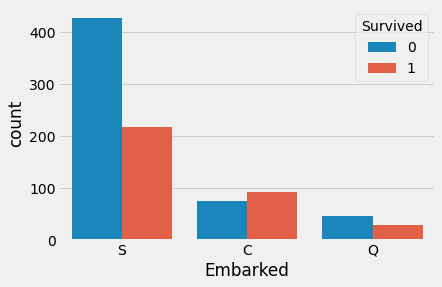

In [36]:
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.show()

Roughly 400 people who embarked at location S did not survive. It is also interesting that when comparing locations S, C, and Q, people that embarked at location S also had the highest survival rates. How could this possibly be? One explanation could be that most people converged at location S when ship was about wreck. This scenario is support by the fact that more than 600 people embarked at S while less than 200 people embarked at locations C & Q respectively.

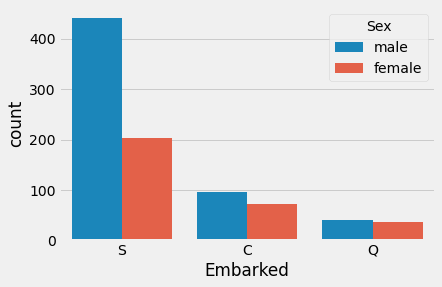

In [117]:
sns.countplot(x='Embarked', hue='Sex', data=data)
plt.show()

## What Were The Survival Rates Based On Age?

In [56]:
survived = data['Survived'] == 1
not_survived = data['Survived'] == 0
survived_by_age = data[survived]['Age']
not_survived_by_age = data[not_survived]['Age']

Text(0.5, 0.98, 'Survival Rates By Age')

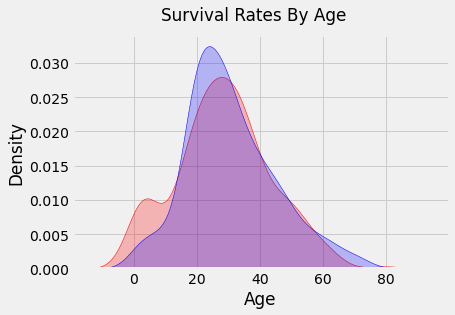

In [64]:
fig, ax = plt.subplots()
sns.kdeplot(survived_by_age, shade=True, color='red', label='survived', ax=ax)
sns.kdeplot(not_survived_by_age, shade=True, color='blue', label='did not survive', ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Density')
fig.suptitle('Survival Rates By Age')

## How Was Age Distributed Among The Boarders?

Ages between 20 and 30 had the highest survival rates. This age range also had the highest death rates. 

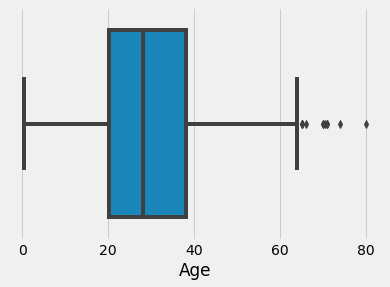

In [70]:
sns.boxplot(x='Age', hue='Survived', data=data)
plt.show()

In [71]:
data['Pclass'].unique()

array([3, 1, 2])

In [81]:
class_3_fares = data[data['Pclass'] == 3]['Fare']
class_3_fares.mean()

13.675550101832997

In [80]:
class_2_fares = data[data['Pclass'] == 2]['Fare']
class_2_fares.mean()

20.66218315217391

In [79]:
class_1_fares = data[data['Pclass'] == 1]['Fare']
class_1_fares.mean()

84.15468749999992

## How Were The Tickets At Class 1, 2, 3 Distributed?

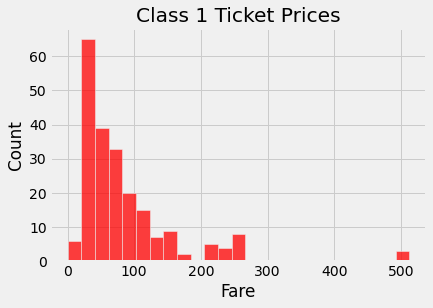

In [92]:
sns.histplot(class_1_fares, color='red')
plt.title('Class 1 Ticket Prices')
plt.show()

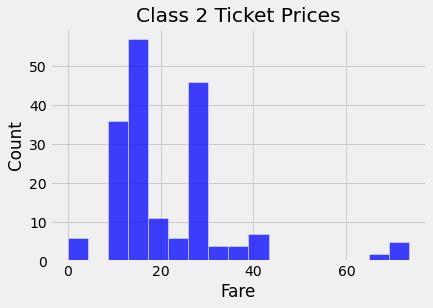

In [90]:
sns.histplot(class_2_fares, color='blue')
plt.title('Class 2 Ticket Prices')
plt.show()

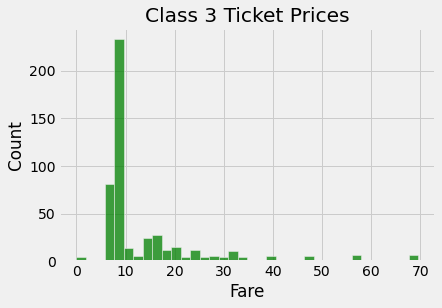

In [89]:
sns.histplot(class_3_fares, color='green')
plt.title('Class 3 Ticket Prices')
plt.show()

Class 3 tickets had most the cheapest fare overall fares did not go higher than 80 currency units. Conversely, Class 1 had some of the most expensive fares.

## What About The People With No Cabin Numbers?

In [116]:
missing_cabin_num = data[data['Cabin'].isna()]

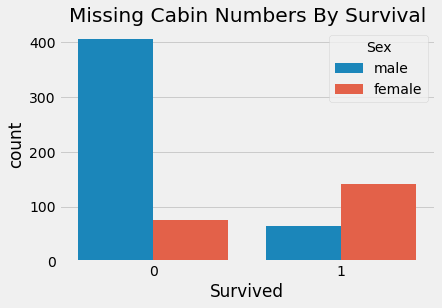

In [102]:
sns.countplot(x='Survived', hue='Sex', data=missing_cabin_num)
plt.title('Missing Cabin Numbers By Survival')
plt.show()